<a href="https://colab.research.google.com/github/malajvan/LBT_Review/blob/main/develop_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt


In [110]:
df=pd.read_csv('src/data/clean_reviews.csv', index_col=0)
df.head()

,reviewer_name,review_id,profile_href,star,time,text
0,Marjolaine G,ChZDSUhNMG9nS0VJQ0FnSURtN2VqZlN3EAE,https://www.google.com/maps/contrib/1138505961...,5,2022-02-20 00:00:00,vietnamese fusion restaurant funky atmosphere ...
1,Pierre Ngo,ChZDSUhNMG9nS0VJQ0FnSUMtNzQ3X1d3EAE,https://www.google.com/maps/contrib/1176635212...,5,2022-11-20 00:00:00,food drink really yummy comforting stomach ser...
2,Willowspritew W,ChZDSUhNMG9nS0VJQ0FnSURlN2JXOVh3EAE,https://www.google.com/maps/contrib/1088170662...,5,2022-10-20 00:00:00,cocktail drink excellent came group friend ram...
3,Khash A.,ChdDSUhNMG9nS0VJQ0FnSUQybjllTHdBRRAB,https://www.google.com/maps/contrib/1053325785...,3,2022-06-20 00:00:00,overall experience wa positive glad tried ulti...
4,Tracy Schmidt,ChZDSUhNMG9nS0VJQ0FnSUNldTRPUktBEAE,https://www.google.com/maps/contrib/1169950666...,5,2022-10-20 00:00:00,fantastic really interesting balanced flavor r...


Divide into positive and negative reviews based on stars: 1-3: negative, 4-5: positive

In [111]:
df['sentiment']='negative'
df.loc[df['star']>2, 'sentiment']='positive'
df

,reviewer_name,review_id,profile_href,star,time,text,sentiment
0,Marjolaine G,ChZDSUhNMG9nS0VJQ0FnSURtN2VqZlN3EAE,https://www.google.com/maps/contrib/1138505961...,5,2022-02-20 00:00:00,vietnamese fusion restaurant funky atmosphere ...,positive
1,Pierre Ngo,ChZDSUhNMG9nS0VJQ0FnSUMtNzQ3X1d3EAE,https://www.google.com/maps/contrib/1176635212...,5,2022-11-20 00:00:00,food drink really yummy comforting stomach ser...,positive
2,Willowspritew W,ChZDSUhNMG9nS0VJQ0FnSURlN2JXOVh3EAE,https://www.google.com/maps/contrib/1088170662...,5,2022-10-20 00:00:00,cocktail drink excellent came group friend ram...,positive
3,Khash A.,ChdDSUhNMG9nS0VJQ0FnSUQybjllTHdBRRAB,https://www.google.com/maps/contrib/1053325785...,3,2022-06-20 00:00:00,overall experience wa positive glad tried ulti...,positive
4,Tracy Schmidt,ChZDSUhNMG9nS0VJQ0FnSUNldTRPUktBEAE,https://www.google.com/maps/contrib/1169950666...,5,2022-10-20 00:00:00,fantastic really interesting balanced flavor r...,positive
...,...,...,...,...,...,...,...
973,Julien Lessard,ChZDSUhNMG9nS0VJQ0FnSUM2aV9tVkF3EAE,https://www.google.com/maps/contrib/1184051946...,5,2021-12-20 00:00:00,NaN,positive
974,Yannick Labrecque,ChZDSUhNMG9nS0VJQ0FnSUNBX3VPYkFnEAE,https://www.google.com/maps/contrib/1081305254...,5,2018-12-20 00:00:00,NaN,positive
975,Fred L,ChZDSUhNMG9nS0VJQ0FnSURZMDVlUUFREAE,https://www.google.com/maps/contrib/1116612267...,5,2019-12-20 00:00:00,NaN,positive
976,caroline gervais,ChRDSUhNMG9nS0VJQ0FnSURvaU50bxAB,https://www.google.com/maps/contrib/1130245073...,4,2019-12-20 00:00:00,NaN,positive


In [112]:
words = set(nltk.corpus.words.words())
positive=' '.join(list(df[df['sentiment']=='positive']['text'].dropna()))
negative=' '.join(list(df[df['sentiment']=='negative']['text'].dropna()))
positive=" ".join(w for w in nltk.wordpunct_tokenize(positive) if (w.lower() in words or not w.isalpha()) and len(w)>2)
negative=" ".join(w for w in nltk.wordpunct_tokenize(negative) if (w.lower() in words or not w.isalpha()) and len(w)>2)
print('positive:',positive)
print('negative:',negative)

positive: fusion restaurant funky atmosphere friendly fast service food generous cocktail lot vegetarian option well overall really happy meal indulgent split friend starter kola noodle side definitely satisfying food drink really yummy comforting stomach service excellent employee really helpful friendly really decoration place really felt cozy comeback cocktail drink excellent came group friend festival tried cheesy turned amazing cheese sauce topping cheese curd fish tofu quite spicy good made want continue eating despite spice drink husband ordered quite nice frothy top nice scent lime nice orange base nice kick sauce went well meanwhile tofu boozy ginger ale hint maple syrup bartender also group shot green tea whisky quite refreshing prepared bit wait come time place quite popular overall experience positive glad tried ultimately special enough second visit opinion ordered imperial roll lobster mac cheese sate drip pho major complaint simply enough food waiter behemoth amount food

In [113]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
token_pos= tokenizer.tokenize(positive)
token_neg= tokenizer.tokenize(negative)

We would like now to see the frequency distribution of the words

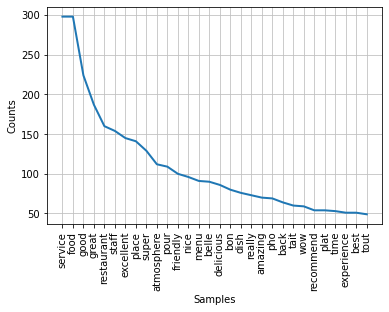

In [114]:
freq_pos=nltk.FreqDist(token_pos)
freq_pos.plot(30)

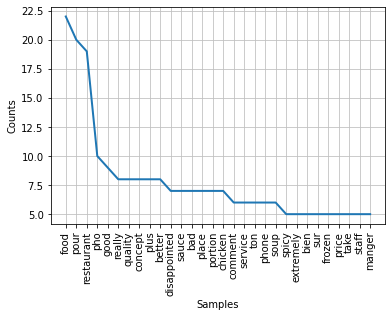

In [115]:
freq_pos=nltk.FreqDist(token_neg)
freq_pos.plot(30)